# Label transfer from scRNA-seq dataset via Pearson correlation 

In this notebook, we will show how to transfer labels from a reference single-cell RNA-sequencing (scRNA-seq) dataset via a lightweight approach. We will use Pearson correlation to find the celltype with the highest expression correlation for each cell the spatial transcriptomics datasset, according to [CellSPA](https://github.com/SydneyBioX/CellSPA).

## Load scRNA-seq dataset

We use the scRNA-seq dataset of diffuse large B-cell lymphoma (DLBCL) samples from [Dong et al.](https://www.biorxiv.org/content/10.1101/2024.11.01.621259v1) published on [CellxGene](https://www.biorxiv.org/content/10.1101/2024.11.01.621259v1).

In [2]:
import anndata as ad
from pathlib import Path

scRNAseq_data_path = Path("/g/huber/projects/CODEX/segtraq/data/label_transfer/scRNA_seq_DLBCL_matched_with_2_C1.h5ad")
adata_ref = ad.read(scRNAseq_data_path)

/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
adata_ref

AnnData object with n_obs × n_vars = 29184 × 442
    obs: 'cell_type', 'is_primary_data', 'sample_id'

The counts in the reference dataset are already log-normalized, so we can copy that matrix to a layer called 'logcounts'.

In [5]:
adata_ref.X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.38975334, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(29184, 442))

In [6]:
adata_ref.layers["logcounts"] = adata_ref.X.copy()

We aggregate log-normalized gene expression values (`logcounts`) across cells grouped by their annotated cell type, computing the mean expression per gene within each cell type. This yields a reference expression profile for each cell type.

In [ ]:
import numpy as np
logcounts = adata_ref.layers["logcounts"]  
# If it's sparse, convert to dense
if not isinstance(logcounts, np.ndarray):
    logcounts = logcounts.toarray()
    
celltypes = adata_ref.obs["cell_type"]

In [11]:
import pandas as pd
logcounts_df = pd.DataFrame(logcounts, columns=adata_ref.var_names)
logcounts_df["celltype"] = celltypes.values

ref_mean_df = logcounts_df.groupby("celltype").mean()

/tmp/ipykernel_2382657/1950447002.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ref_mean_df = logcounts_df.groupby("celltype").mean()


In [12]:
ref_mean_df

,A2M,ABCA1,ACACA,ACADM,ACKR1,ACKR4,ACTA2,ADAM10,ADAM17,ADCY7,...,IL9,IGLC3,HMGB1,GNAS,IL22,IGLC2,DRAIC,ANGPT2,ICOSLG,IL6ST
celltype,,,,,,,,,,,,,,,,,,,,,
B,0.000000,0.016769,0.156024,0.159486,0.000000,0.022256,0.050791,0.213838,0.229673,0.270148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DC_pc,0.036694,0.169812,0.117063,0.444065,0.004440,0.003707,0.140305,0.437622,0.294588,0.784672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Endothelia,1.471162,0.178528,0.270104,0.289596,0.885165,0.013624,0.112109,0.361705,0.256111,0.163421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Epithelia,0.019746,0.080427,0.254660,0.178775,0.001124,0.026345,0.017461,0.119152,0.206132,0.108029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fibro_Muscle,0.266040,0.312430,0.264807,0.343359,0.072844,0.003145,0.434594,0.369848,0.277516,0.193193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mono_Macro,0.656003,0.890168,0.149249,0.331428,0.014655,0.002430,0.114052,0.358778,0.334295,0.585345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NK,0.021211,0.106054,0.201798,0.357114,0.005284,0.000000,0.101637,0.559331,0.245895,0.659352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pericyte,2.253352,0.360183,0.252609,0.435539,0.326374,0.000000,0.803320,0.553716,0.318709,0.157481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T_CD4,0.029272,0.077661,0.152805,0.257307,0.008759,0.000000,0.137884,0.459278,0.233179,0.363228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Load spatialData object

Next, we load the spatialdata object of a Xenium DLBCL sample.

In [126]:
import spatialdata as sd

sdata = sd.read_zarr("/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/tma_2/2_C1/proseg_output/spatialData_2_C1_proseg.zarr")

version mismatch: detected: RasterFormatV02, requested: FormatV04
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


We perform quality control steps (filtering based on #transcripts and #genes per cell) and log-normalization. 

In [127]:
adata = sdata['table']

In [131]:
import scanpy as sc
import segtraq as st

# Compute QC metrics
transcript_counts = st.bl.transcripts_per_cell(sdata)
gene_counts = st.bl.genes_per_cell(sdata)

transcript_counts.index = transcript_counts.index.astype(str)
gene_counts.index = gene_counts.index.astype(str)

transcript_counts_filtered = transcript_counts.loc[adata.obs_names]
gene_counts_filtered = gene_counts.loc[adata.obs_names]

adata.obs["total_transcripts"] = transcript_counts_filtered["transcript_count"]
adata.obs["total_genes"] = gene_counts_filtered["gene_count"]


In [144]:
adata.obs

,centroid_x,centroid_y,cell_size,axis_minor_length,axis_major_length,centroid-0,centroid-1,eccentricity,solidity,perimeter,sample_id,TMA,region,mask_id,total_transcripts,total_genes
cell_id,,,,,,,,,,,,,,,,
1,377.79850,513.17664,395.71875,6.590376,8.878127,512.720930,376.953488,0.670050,0.860000,24.899495,2_C1,2,cell_labels,1,993,73
2,349.86170,643.56384,92.53125,2.653300,5.366563,643.600000,349.000000,0.869227,0.500000,0.000000,2_C1,2,cell_labels,2,985,89
3,401.73760,398.32178,397.68750,5.502993,9.527791,396.305556,400.916667,0.816339,0.800000,21.071068,2_C1,2,cell_labels,3,959,136
4,257.44656,319.80533,773.71875,9.718573,11.625859,319.301205,257.168675,0.548814,0.813725,34.384776,2_C1,2,cell_labels,4,932,161
5,195.35858,549.35860,194.90625,3.843169,5.055352,548.785714,194.928571,0.649668,0.875000,11.414214,2_C1,2,cell_labels,5,926,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,539.39000,343.35000,196.87500,6.445665,16.611864,343.063492,539.158730,0.921653,0.684783,40.798990,2_C1,2,cell_labels,5843,61,85
5844,256.99690,636.03420,316.96875,7.896618,12.941854,636.506667,256.333333,0.792277,0.842697,35.142136,2_C1,2,cell_labels,5844,61,41
5845,310.64035,493.85090,112.21875,6.976622,7.382183,493.272727,310.151515,0.326891,0.733333,24.727922,2_C1,2,cell_labels,5845,60,109


In [133]:
# Filter outliers 
qc_range = {
    "total_transcripts": (10, 2000),
    "total_genes": (5, np.inf)
}

for key, (low, high) in qc_range.items():
    mask = (adata.obs[key] >= low) & (adata.obs[key] <= high)
    adata = adata[mask.to_numpy()].copy()

In [134]:
# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers["logcounts"] = adata.X.copy()

/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


## Label transfer via correlation

Now, we compute the Pearson correlation between each query cell in the processed `AnnData` object and the mean expression profiles of reference cell types.

We first identify the common genes between the query data and the reference matrix, and then compute a correlation matrix where each entry reflects the similarity between a query cell and a reference cell type.

For each query cell, we:

Assign the most correlated reference cell type (i.e., the one with the highest Pearson correlation),

Store both the correlation value and the predicted cell type.

This provides a label transfer from the reference to the query dataset based on global transcriptomic similarity.

In [141]:
from scipy.spatial.distance import cdist
from anndata import AnnData

def assign_celltype_by_pearson(
    adata: AnnData,
    ref_mean_df: pd.DataFrame,
    layer: str = "logcounts"
) -> pd.DataFrame:
    """
    Assigns cell types to cells in `adata` by computing Pearson correlation
    with reference expression profiles.

    Parameters
    ----------
    adata : AnnData
        Query dataset with gene expression data in the specified layer.
    ref_mean_df : pd.DataFrame
        Reference expression matrix with shape (cell_types x genes).
    layer : str, default="logcounts"
        Layer in `adata` to use for expression values.

    Returns
    -------
    pd.DataFrame
        DataFrame with `cell_id` and assigned `celltype`.
    """

    # Extract query expression data
    X_query = pd.DataFrame(
        adata.layers[layer].toarray() if hasattr(adata.layers[layer], "toarray") else adata.layers[layer],
        index=adata.obs_names,
        columns=adata.var_names
    )

    # Align gene order
    common_genes = X_query.columns.intersection(ref_mean_df.columns)
    if len(common_genes) == 0:
        raise ValueError("No common genes found between query and reference.")

    X_query = X_query[common_genes]
    X_ref = ref_mean_df[common_genes]

    # Compute Pearson correlation (1 - correlation distance)
    cor_mat = 1-cdist(X_query.values, X_ref.values, metric="correlation")
    cor_mat_df = pd.DataFrame(cor_mat, index=adata.obs_names, columns=X_ref.index)

    # Assign best-matching reference cell type
    best_celltype = cor_mat_df.idxmax(axis=1)

    # Return as DataFrame
    return pd.DataFrame({
        "cell_id": adata.obs_names,
        "celltype": best_celltype.values
    })


In [146]:
result_df = assign_celltype_by_pearson(adata, ref_mean_df)

/tmp/ipykernel_2382657/4082630372.py:48: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  best_celltype = cor_mat_df.idxmax(axis=1)


In [158]:
result_df['celltype'].value_counts()

celltype
Tumor_DLBCL     2293
T_CD8            952
Mono_Macro       789
T_CD4            599
T_dividing       521
Fibro_Muscle     204
cDC              134
Pericyte         123
B                100
Endothelia        62
NK                35
DC_pc             23
Epithelia          6
Name: count, dtype: int64

In [156]:
result_df.set_index("cell_id", inplace=True)
adata.obs["celltype_corr"] = result_df.loc[adata.obs_names, "celltype"]

In [163]:
# define colors for cell types

col_celltype = {
    "B": "#fb8072",
    "cDC": "#bc80bd",
    "DC_pc": "#910290",
    "Endothelia": "#fdb462",
    "Epithelia": "#959059",
    "Fibro_Muscle": "#fed9a6",
    "Mono_Macro": "#a6cee3",
    "NK": "#2782bb",
    "Pericyte": "#d2cd7e",
    "T_CD4": "#3c7761",
    "T_CD4_reg": "#66a61e",
    "T_CD8": "#66c2a5",
    "T_dividing": "#1b9e77",
    "Tumor_DLBCL": "#d45943"
}


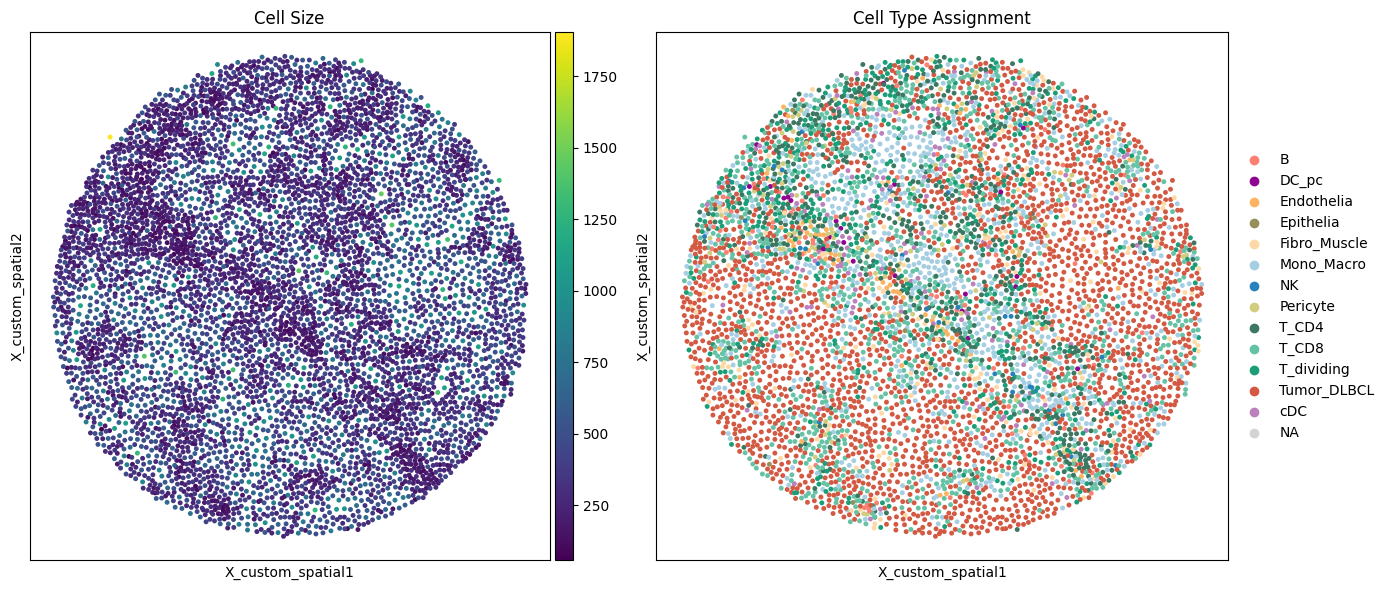

In [170]:
import matplotlib.pyplot as plt

# Set up side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Cell size
sc.pl.embedding(
    adata,
    basis='X_custom_spatial',
    color='cell_size',
    size=50,
    ax=axs[0],
    show=False,
    title='Cell Size'
)

# Plot 2: Cell types with custom colors
sc.pl.embedding(
    adata,
    basis='X_custom_spatial',
    color='celltype_corr',
    size=50,
    palette=col_celltype,  # your custom palette from before
    ax=axs[1],
    show=False,
    title='Cell Type Assignment'
)

plt.tight_layout()
plt.show()
